In [33]:
import cx_Oracle
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import re
from matplotlib import rc
rc("font", family = "Malgun Gothic")
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Binarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [34]:
db = cx_Oracle.connect("c##lm", "lm", "localhost:1521/xe")
cursor = db.cursor()
cursor.execute("select * from CUSTOMERDATA")
x = cursor.fetchall()

customerdata = pd.DataFrame(x)

cursor.execute("select column_name from user_tab_columns where table_name = 'CUSTOMERDATA'")
col = cursor.fetchall()
list1 = []
for i in col:
    for j in i:
        list1.append(j)
        
customerdata.columns = list1

In [35]:
customerdata["14_1분기"].fillna(0, inplace = True)
customerdata["14_2분기"].fillna(0, inplace = True)
customerdata["14_3분기"].fillna(0, inplace = True)
customerdata["14_4분기"].fillna(0, inplace = True)
customerdata["15_1분기"].fillna(0, inplace = True)
customerdata["15_2분기"].fillna(0, inplace = True)
customerdata["15_3분기"].fillna(0, inplace = True)
customerdata["15_4분기"].fillna(0, inplace = True)

In [36]:
customerdata["14_1분기"] = round(customerdata["14_1분기"] * 1.0109552634860561)
customerdata["14_2분기"] = round(customerdata["14_2분기"] * 1.005856410415038)
customerdata["14_3분기"] = round(customerdata["14_3분기"] * 1.0238994118951612)
customerdata["14_4분기"] = round(customerdata["14_4분기"] * 0.9669899689775655)
customerdata["15_1분기"] = round(customerdata["15_1분기"] * 1.0109552634859216)
customerdata["15_2분기"] = round(customerdata["15_2분기"] * 1.005856410415038)
customerdata["15_3분기"] = round(customerdata["15_3분기"] * 1.0238994118951612)
customerdata["15_4분기"] = round(customerdata["15_4분기"] * 0.9669899689775655)

In [37]:
customerdata["분기 총변화"] = (
    customerdata["14_2분기변화"]+
    customerdata["14_3분기변화"]+
    customerdata["14_4분기변화"]+
    customerdata["15_1분기변화"]+
    customerdata["15_2분기변화"]+
    customerdata["15_3분기변화"]+
    customerdata["15_4분기변화"]
)

In [38]:
def get_loss_target(amount):
    cat = ''
    if amount < 0: cat = 1
    else: cat = 0
    return cat

In [39]:
customerdata["감소고객"] = customerdata["분기 총변화"].apply(lambda x : get_loss_target(x))

In [40]:
def get_Rrank(amount):
    cat = ''
    if amount <= -1: cat = 'Unknown'
    elif amount < 4: cat = 1
    elif amount < 8: cat = 2
    elif amount < 31: cat = 3
    elif amount < 183: cat = 4
    else : cat = 5
    
    return cat

In [41]:
def get_Frank(amount):
    cat = ''
    if amount <= -1: cat = 'Unknown'
    elif amount < 618: cat = 11
    elif amount < 772: cat = 10
    elif amount < 938: cat = 9
    elif amount < 1124: cat = 8
    elif amount < 1333: cat = 7
    elif amount < 1556: cat = 6
    elif amount < 1808: cat = 5
    elif amount < 2114: cat = 4
    elif amount < 2541: cat = 3
    elif amount < 4000: cat = 2
    else : cat = 1
    
    return cat

In [42]:
def get_Mrank(amount):
    cat = ''
    if amount <= -1: cat = 'Unknown'
    elif amount < 8000000: cat = 11
    elif amount < 10000000: cat = 10
    elif amount < 12000000: cat = 9
    elif amount < 14500000: cat = 8
    elif amount < 17500000: cat = 7
    elif amount < 22000000: cat = 6
    elif amount < 32000000: cat = 5
    elif amount < 50000000: cat = 4
    elif amount < 80000000: cat = 3
    elif amount < 120000000: cat = 2
    else : cat = 1
    
    return cat

In [43]:
def get_AMrank(amount):
    cat = ''
    if amount <= -1: cat = 'Unknown'
    elif amount < 5000: cat = 11
    elif amount < 6000: cat = 10
    elif amount < 8000: cat = 9
    elif amount < 9000: cat = 8
    elif amount < 12000: cat = 7
    elif amount < 18000: cat = 6
    elif amount < 31000: cat = 5
    elif amount < 53000: cat = 4
    elif amount < 100000: cat = 3
    elif amount < 150000: cat = 2
    else : cat = 1
    
    return cat

In [44]:
def get_age(x):
    cat = ''
    if x == "19세 이하" or x == "20세~24세": cat = "학생층"
    elif x == "25세~29세" or x == "30세~34세": cat = "청년층"
    elif x == "35세~39세" or x == "40세~44세": cat = "중년층"
    elif x == "45세~49세" or x == "50세~54세": cat = "장년층"
    else : cat = "노년층"
    
    return cat


In [45]:
def get_region(x):
    cat = ''
    if x == "110": cat = "경기"
    elif x == "210": cat = "인천"
    elif x == "240": cat = "강원"
    elif x == "270": cat = "충북"
    elif x == "300": cat = "세종"
    elif x == "310": cat = "충남"
    elif x == "340": cat = "대전"
    elif x == "360": cat = "경북"
    elif x == "410": cat = "대구"
    elif x == "440": cat = "울산"
    elif x == "460": cat = "부산"
    elif x == "500": cat = "경남"
    elif x == "540": cat = "전북"
    elif x == "570": cat = "전남"
    elif x == "610": cat = "광주"
    elif x == "630": cat = "제주"
    else : cat = "서울"
    
    return cat

In [46]:
customerdata["R 등급"] = customerdata["최근성"].apply(lambda x : get_Rrank(x))
customerdata["F 등급"] = customerdata["행동 빈도"].apply(lambda x : get_Frank(x))
customerdata["M 등급"] = customerdata["구매 총액"].apply(lambda x : get_Mrank(x))
customerdata["AM 등급"] = customerdata["평균구매액"].apply(lambda x : get_AMrank(x))
customerdata["거주지역"] = customerdata["거주지역"].apply(lambda x : get_region(x))
customerdata["연령대"] = customerdata["연령대"].apply(lambda x : get_age(x))

In [47]:
customerdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19383 entries, 0 to 19382
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   고객번호      19383 non-null  object 
 1   성별        19383 non-null  object 
 2   연령대       19383 non-null  object 
 3   거주지역      19383 non-null  object 
 4   A선호점포     19155 non-null  float64
 5   B선호점포     18575 non-null  float64
 6   C선호점포     17110 non-null  float64
 7   D선호점포     3791 non-null   float64
 8   선호제휴사     19383 non-null  object 
 9   선호점포      19383 non-null  int64  
 10  선호제휴점포    19383 non-null  object 
 11  14_1분기    19383 non-null  float64
 12  14_2분기    19383 non-null  float64
 13  14_3분기    19383 non-null  float64
 14  14_4분기    19383 non-null  float64
 15  15_1분기    19383 non-null  float64
 16  15_2분기    19383 non-null  float64
 17  15_3분기    19383 non-null  float64
 18  15_4분기    19383 non-null  float64
 19  14_2분기변화  18983 non-null  float64
 20  14_3분기변화  19095 non-null  fl

Text(0.5, 1.0, '계절성 제거')

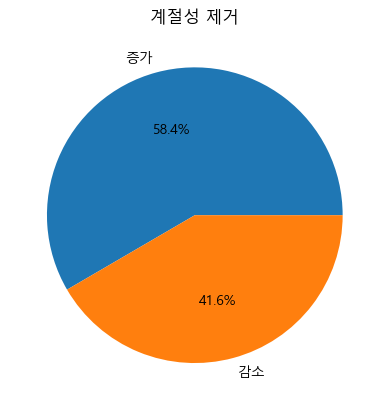

In [48]:
count = customerdata["감소고객"].value_counts()
index = list(count.index)
value = list(count)
a = plt.pie(value, labels = ["증가", "감소"], autopct='%1.1f%%')
plt.title("계절성 제거")

In [49]:
value

[11319, 8064]

In [50]:
delta1 = customerdata[customerdata["감소고객"] == 1]
delta0 = customerdata[customerdata["감소고객"] == 0]

up = delta0[['14_1분기', '14_2분기', '14_3분기', '14_4분기',
       '15_1분기', '15_2분기', '15_3분기', '15_4분기']].sum().sum()

down = delta1[['14_1분기', '14_2분기', '14_3분기', '14_4분기',
       '15_1분기', '15_2분기', '15_3분기', '15_4분기']].sum().sum()

Text(0.5, 1.0, '증가/감소고객 매출 차이')

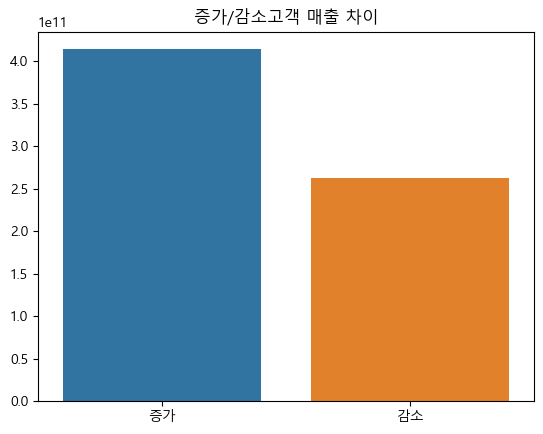

In [51]:
sns.barplot(x = ["증가","감소"], y = [up, down])
plt.title("증가/감소고객 매출 차이")

In [52]:
customerdata["14_2변화율"] = round(customerdata["14_2분기"] / customerdata["14_1분기"]* 100,2)
customerdata["14_3변화율"] = round(customerdata["14_3분기"] / customerdata["14_2분기"]* 100,2)
customerdata["14_4변화율"] = round(customerdata["14_4분기"] / customerdata["14_3분기"]* 100,2)
customerdata["15_1변화율"] = round(customerdata["15_1분기"] / customerdata["14_4분기"]* 100,2)
customerdata["15_2변화율"] = round(customerdata["15_2분기"] / customerdata["15_1분기"]* 100,2)
customerdata["15_3변화율"] = round(customerdata["15_3분기"] / customerdata["15_2분기"]* 100,2)
customerdata["15_4변화율"] = round(customerdata["15_4분기"] / customerdata["15_3분기"]* 100,2)

8191    0
Name: 감소고객, dtype: int64


<AxesSubplot:>

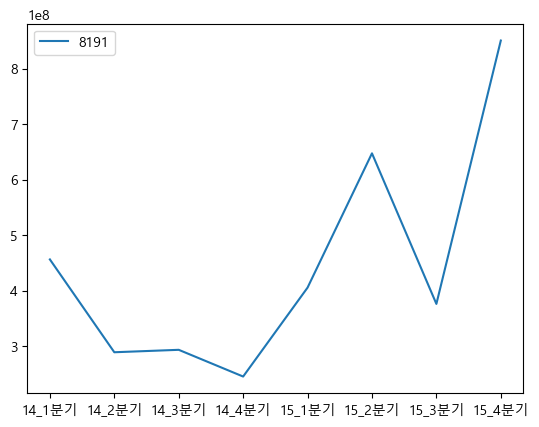

In [53]:
c = customerdata[customerdata["고객번호"] == "15999"]
print(c["감소고객"])
sns.lineplot(c[['14_1분기', '14_2분기', '14_3분기', '14_4분기','15_1분기', '15_2분기', '15_3분기', '15_4분기']].transpose())

In [54]:
delta = customerdata[customerdata["감소고객"] == 1]

In [55]:
delta["14_2예측"] = delta["14_1분기"] * 1.0320933400038665
delta["14_3예측"] = delta["14_2예측"] * 0.9269852979723926
delta["14_4예측"] = delta["14_3예측"] * 1.282609129616268
delta["15_1예측"] = delta["14_4예측"] * 0.8748904692123978
delta["15_2예측"] = delta["15_1예측"] * 1.003773385020013
delta["15_3예측"] = delta["15_2예측"] * 0.9375962335791909
delta["15_4예측"] = delta["15_3예측"] * 1.238677904420186
delta["예상이득"] = (
    delta["14_2예측"] - delta["14_2분기"]+
    delta["14_3예측"] - delta["14_3분기"]+
    delta["14_4예측"] - delta["14_4분기"]+
    delta["15_1예측"] - delta["15_1분기"]+
    delta["15_2예측"] - delta["15_2분기"]+
    delta["15_3예측"] - delta["15_3분기"]+
    delta["15_4예측"] - delta["15_4분기"]
)

In [56]:
profit = delta[["예상이득"]].sum()
int(profit)

115066924797

In [57]:
total15 = customerdata[['15_1분기', '15_2분기', '15_3분기', '15_4분기']].sum().sum()
total15

347485728658.0

In [58]:
total14 = customerdata[['14_1분기', '14_2분기', '14_3분기', '14_4분기']].sum().sum()

Text(0.5, 1.0, '예상 매출액')

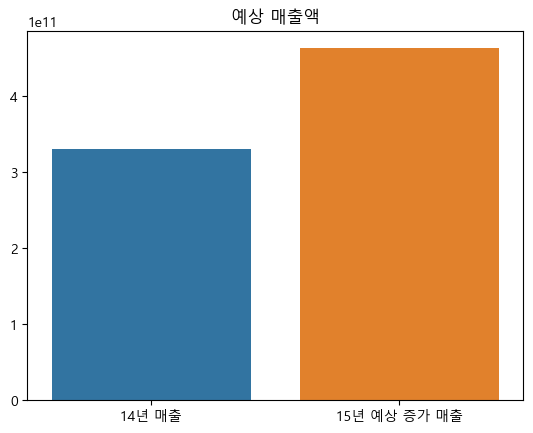

In [59]:
sns.barplot(x = ["14년 매출", "15년 예상 증가 매출"], y = [total14, total15+int(profit)])
plt.title("예상 매출액")

In [60]:
customerdata.columns

Index(['고객번호', '성별', '연령대', '거주지역', 'A선호점포', 'B선호점포', 'C선호점포', 'D선호점포',
       '선호제휴사', '선호점포', '선호제휴점포', '14_1분기', '14_2분기', '14_3분기', '14_4분기',
       '15_1분기', '15_2분기', '15_3분기', '15_4분기', '14_2분기변화', '14_3분기변화',
       '14_4분기변화', '15_1분기변화', '15_2분기변화', '15_3분기변화', '15_4분기변화', '최근성',
       '행동 빈도', '구매 총액', '평균구매액', '선호제품1', '선호제품2', '선호제품3', '선호제품14_1',
       '선호제품14_2', '선호제품14_3', '선호제품15_3', '선호제품15_2', '선호제품15_1', '분기 총변화',
       '감소고객', 'R 등급', 'F 등급', 'M 등급', 'AM 등급', '14_2변화율', '14_3변화율',
       '14_4변화율', '15_1변화율', '15_2변화율', '15_3변화율', '15_4변화율'],
      dtype='object')

In [61]:
df1 = customerdata[customerdata["R 등급"] == 1]
df0 = customerdata[customerdata["R 등급"] != 1]
df2 = df0[df0["R 등급"] != 2]

<AxesSubplot:xlabel='행동 빈도', ylabel='구매 총액'>

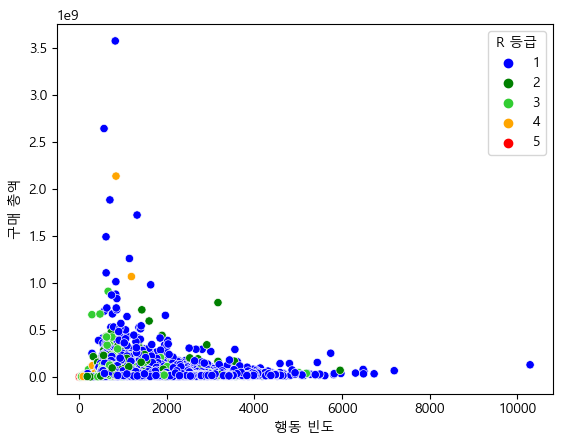

In [62]:
my_palette = ["blue", "green", "limegreen", "orange", "red"]
sns.scatterplot(data = customerdata, x = "행동 빈도", y = "구매 총액", hue="R 등급", palette=my_palette)

<AxesSubplot:xlabel='행동 빈도', ylabel='구매 총액'>

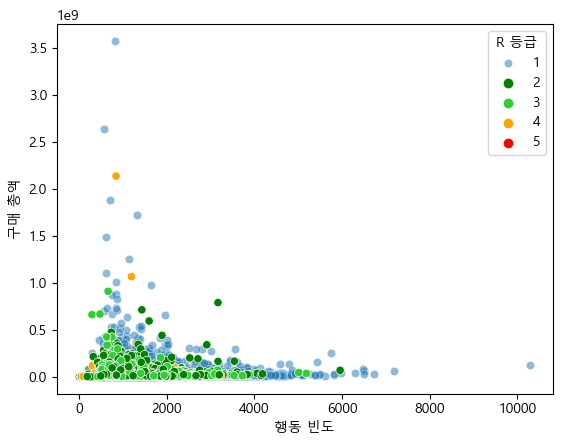

In [63]:
my_palette = ["green", "limegreen", "orange", "red"]
sns.scatterplot(data = df1, x = "행동 빈도", y = "구매 총액", palette= "blue", alpha = 0.5, label = "1")
sns.scatterplot(data = df0, x = "행동 빈도", y = "구매 총액", hue="R 등급", palette=my_palette)

<AxesSubplot:xlabel='행동 빈도', ylabel='구매 총액'>

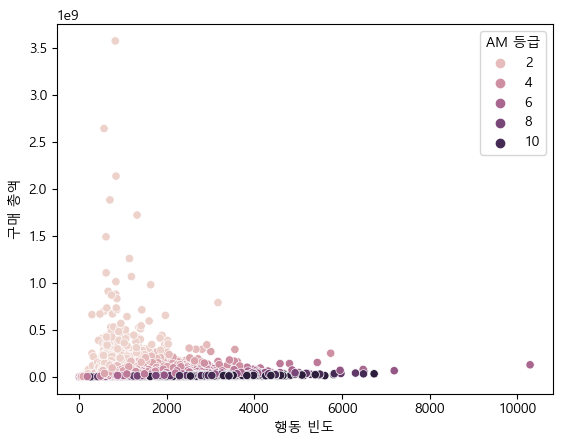

In [64]:
sns.scatterplot(data = customerdata, x = "행동 빈도", y = "구매 총액", hue = "AM 등급")

In [65]:
customerdata["AM 등급"].value_counts()

9     2808
11    2338
3     2078
7     2065
5     1946
4     1928
6     1776
10    1623
8     1077
2      945
1      799
Name: AM 등급, dtype: int64

In [66]:
c

,고객번호,성별,연령대,거주지역,A선호점포,B선호점포,C선호점포,D선호점포,선호제휴사,선호점포,...,F 등급,M 등급,AM 등급,14_2변화율,14_3변화율,14_4변화율,15_1변화율,15_2변화율,15_3변화율,15_4변화율
8191,15999,M,중년층,서울,30.0,5.0,NaN,NaN,A,30,...,9,1,1,63.3,101.52,83.56,165.48,159.77,58.06,226.36


In [67]:
customerdata[customerdata["감소고객"] == 1]["AM 등급"].value_counts()

9     1232
11    1037
7      899
5      802
4      765
10     756
3      755
6      732
8      485
2      319
1      282
Name: AM 등급, dtype: int64

In [68]:
customerdata.columns

Index(['고객번호', '성별', '연령대', '거주지역', 'A선호점포', 'B선호점포', 'C선호점포', 'D선호점포',
       '선호제휴사', '선호점포', '선호제휴점포', '14_1분기', '14_2분기', '14_3분기', '14_4분기',
       '15_1분기', '15_2분기', '15_3분기', '15_4분기', '14_2분기변화', '14_3분기변화',
       '14_4분기변화', '15_1분기변화', '15_2분기변화', '15_3분기변화', '15_4분기변화', '최근성',
       '행동 빈도', '구매 총액', '평균구매액', '선호제품1', '선호제품2', '선호제품3', '선호제품14_1',
       '선호제품14_2', '선호제품14_3', '선호제품15_3', '선호제품15_2', '선호제품15_1', '분기 총변화',
       '감소고객', 'R 등급', 'F 등급', 'M 등급', 'AM 등급', '14_2변화율', '14_3변화율',
       '14_4변화율', '15_1변화율', '15_2변화율', '15_3변화율', '15_4변화율'],
      dtype='object')

In [69]:
count = customerdata["감소고객"].value_counts()
total = count.sum()
print(round(count/total* 100,2))

0    58.4
1    41.6
Name: 감소고객, dtype: float64


In [70]:
customerdata["선호제품2"].value_counts()

신선식품        10558
가공식품         4675
일상용품         3379
패션잡화          360
디지털/가전        202
교육/문화 용품       96
의류             25
가구/인테리어        24
기타             23
의약품/의료기기        5
전문스포츠/레저        2
Name: 선호제품2, dtype: int64

In [71]:
count = customerdata[customerdata["선호제품14_3"] != customerdata["선호제품15_3"]]["감소고객"].value_counts()
total = count.sum()
print(round(count/total* 100,2))
print(round(total/19383*100,2))

0    61.93
1    38.07
Name: 감소고객, dtype: float64
30.9


In [ ]:
제발 현실을 살아 씹덕아
우마무스메는 적당히 보고

In [72]:
customerdata.to_pickle("customerdata.pkl")